In [61]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [62]:
import requests
from io import StringIO

In [63]:
# donor_df = pd.read_csv('Election_Donor_Data.csv')
donor_df = pd.read_csv('Election_Donor_Data.csv',dtype={"contbr_zip": object})

In [64]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [65]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [66]:
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

In [67]:
donor_df['contb_receipt_amt'].value_counts().shape

(8079,)

In [68]:
don_mean=donor_df['contb_receipt_amt'].mean()
don_std=donor_df['contb_receipt_amt'].std()
print("平均{:0.2f} 標準偏差{:0.2f}".format(don_mean,don_std))

平均298.24 標準偏差3749.67


In [69]:
top_donor=donor_df['contb_receipt_amt'].copy()
top_donor.sort_values()
top_donor

0           250.0
1            50.0
2           250.0
3           250.0
4           300.0
5           500.0
6           250.0
7           250.0
8           250.0
9           250.0
10          250.0
11          500.0
12          250.0
13          250.0
14          250.0
15          300.0
16          500.0
17         1000.0
18          250.0
19          300.0
20          500.0
21          250.0
22         2500.0
23         2500.0
24          150.0
25          200.0
26          100.0
27          250.0
28          500.0
29          250.0
            ...  
1001701    2500.0
1001702    2500.0
1001703   -2500.0
1001704   -2500.0
1001705    1000.0
1001706    2500.0
1001707   -2500.0
1001708    2500.0
1001709   -2500.0
1001710   -2500.0
1001711    1000.0
1001712    2500.0
1001713    2500.0
1001714     250.0
1001715     250.0
1001716    1000.0
1001717     100.0
1001718    2500.0
1001719    2500.0
1001720     100.0
1001721     250.0
1001722     100.0
1001723     100.0
1001724     500.0
1001725   

In [70]:
top_donor=top_donor[top_donor>0]
top_donor.sort_values()

335573          0.01
335407          0.01
335352          0.01
324596          0.01
329896          0.01
318560          0.01
335100          0.01
318670          0.01
329984          0.01
335087          0.01
335033          0.01
330220          0.01
330222          0.01
324283          0.01
324170          0.01
334913          0.01
334899          0.01
323823          0.01
324778          0.01
323822          0.01
324838          0.01
324876          0.01
336020          0.01
317634          0.01
325344          0.01
335767          0.01
317753          0.01
325153          0.01
325151          0.01
350626          0.01
             ...    
710177      10000.00
709608      10000.00
99829       10000.00
711167      10000.00
993178      10000.00
710198      10000.00
708928      10000.00
708022      10000.00
709739      10000.00
709859      10000.00
709813      10000.00
708919      10000.00
708138      10000.00
876244      10000.00
91145       10000.00
708898      10000.00
710730      1

In [71]:
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

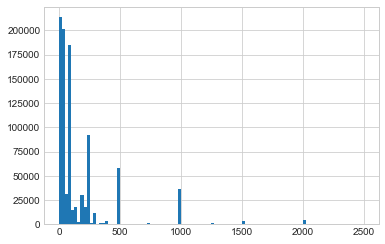

In [72]:
com_don=top_donor[top_donor<2500]
com_don.hist(bins=100)